In [55]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import os

1.Given the following confusion matrix, evaluate (by hand) the model's performance.

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

pos = dog 

neg = cat

In the context of this problem, what is a false positive?
pred it was dog when it was cat

In the context of this problem, what is a false negative?
we pred cats but it was dog 

How would you describe this model?
very confusion would not recommond but  
we are looking for dogs compare to cats 

In [123]:
tp = 46
tn = 34 
fp = 13
fn = 7

In [125]:
accuracy = (tp + tn)/(tp+tn+fp+fn)
accuracy

0.8

2.ou are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

In [126]:
df = pd.read_csv('c3.csv')
df.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


In [73]:
pd.crosstab(df.actual,df.model1)

model1,Defect,No Defect
actual,,
Defect,8,8
No Defect,2,182


In [75]:
pd.crosstab(df.actual,df.model2)

model2,Defect,No Defect
actual,,
Defect,9,7
No Defect,81,103


In [76]:
pd.crosstab(df.actual,df.model3)

model3,Defect,No Defect
actual,,
Defect,13,3
No Defect,86,98


In [61]:
df.info(),df.shape,df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  200 non-null    object
 1   model1  200 non-null    object
 2   model2  200 non-null    object
 3   model3  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


(None,
 (200, 4),
            actual     model1     model2     model3
 count         200        200        200        200
 unique          2          2          2          2
 top     No Defect  No Defect  No Defect  No Defect
 freq          184        190        110        101)

actual
actual
No Defect    184
Defect        16
Name: count, dtype: int64
actual
No Defect    0.92
Defect       0.08
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


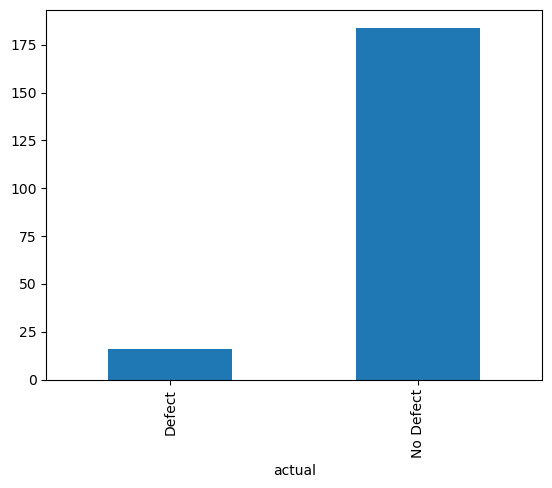


model1
model1
No Defect    190
Defect        10
Name: count, dtype: int64
model1
No Defect    0.95
Defect       0.05
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


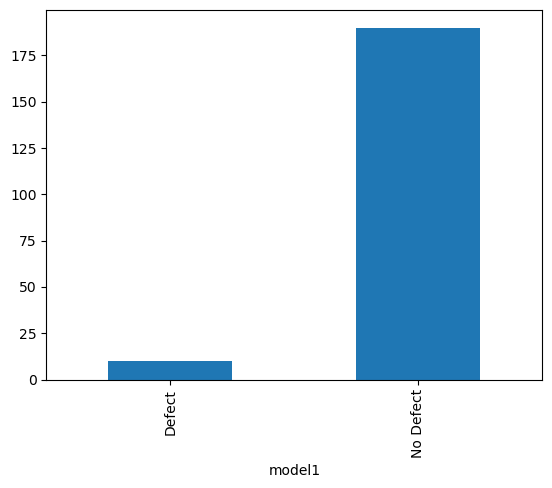


model2
model2
No Defect    110
Defect        90
Name: count, dtype: int64
model2
No Defect    0.55
Defect       0.45
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


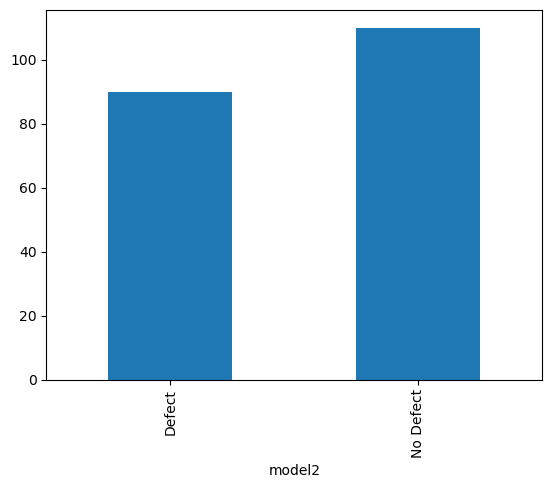


model3
model3
No Defect    101
Defect        99
Name: count, dtype: int64
model3
No Defect    0.505
Defect       0.495
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


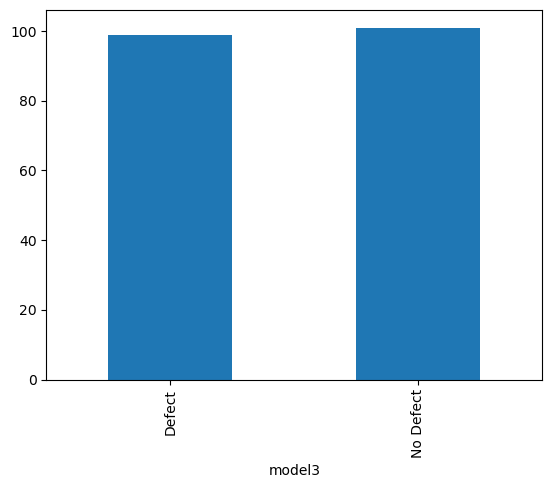

In [71]:
# was not part of the question but i want to see more of the table im looking at
for col in df:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print(df[col].value_counts().sort_index().plot.bar())
    plt.show()
    print()


Which model would be the best fit for this use case?
i belive it is recall so the equation would be tp/(tp+ fn)
pos case = 'defect'
neg case = 'no defect'
false neg:predicted no defect but there was one 
false pos:predicted defect but there was no defect 

In [127]:
m1 = pd.crosstab(df.model1,df.actual)
m1

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


In [128]:
tp = m1.iloc[0,0] #rows, columns
fn = m1.iloc[0,1]
fp = m1.iloc[1,0]
tn = m1.iloc[1,1]

In [130]:
tp/(tp+fp)

0.5

In [134]:
fn

2

In [85]:
m2 = pd.crosstab(df.model2,df.actual)
m2

actual,Defect,No Defect
model2,,
Defect,9,81
No Defect,7,103


In [90]:
tp2 = m2.iloc[0,0] #rows, columns
fn2 = m2.iloc[0,1]
fp2 = m2.iloc[1,0]
tn2 = m2.iloc[1,1]

In [93]:
tp2/(tp2+fp2)

0.5625

In [91]:
m3 = pd.crosstab(df.model3,df.actual)
m3

actual,Defect,No Defect
model3,,
Defect,13,86
No Defect,3,98


In [94]:
tp3 = m3.iloc[0,0] #rows, columns
fn3 = m3.iloc[0,1]
fp3 = m3.iloc[1,0]
tn3 = m3.iloc[1,1]

In [95]:
tp3/(tp3+fp3)

0.8125

Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [96]:
# i belive it going to use the recall function tp/tp+fn
tp/(tp+fn)

0.8

In [97]:
tp2/(tp2+fn2)

0.1

In [98]:
tp3/(tp3+fn3)

0.13131313131313133

You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

In [103]:
df2 = pd.read_csv('gives_you_paws.csv')
df2

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


In [115]:
cs1 = pd.crosstab(df2.model1,df2.actual)
cs1

actual,cat,dog
model1,,
cat,1423,640
dog,323,2614


In [116]:
tp = cs1.iloc[0,0] #rows, columns
fn = cs1.iloc[0,1]
fp = cs1.iloc[1,0]
tn = cs1.iloc[1,1]

In [117]:
cs2 = pd.crosstab(df2.model2,df2.actual)
cs2

actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


In [118]:
tp1 = cs2.iloc[0,0] #rows, columns
fn1 = cs2.iloc[0,1]
fp1 = cs2.iloc[1,0]
tn1 = cs2.iloc[1,1]

In [119]:
cs3 = pd.crosstab(df2.model3,df2.actual)
cs3

actual,cat,dog
model3,,
cat,893,1599
dog,853,1655


In [120]:
tp2 = cs3.iloc[0,0] #rows, columns
fn2 = cs3.iloc[0,1]
fp2 = cs3.iloc[1,0]
tn2 = cs3.iloc[1,1]

In [121]:
cs4 = pd.crosstab(df2.model4,df2.actual)
cs4

actual,cat,dog
model4,,
cat,603,144
dog,1143,3110


In [122]:
tp3 = cs4.iloc[0,0] #rows, columns
fn3 = cs4.iloc[0,1]
fp3 = cs4.iloc[1,0]
tn3 = cs4.iloc[1,1]